In [1]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import nltk
import random
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity      
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
# import spacy
lemmatizer = nltk.stem.WordNetLemmatizer()

# Download required NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JIMOH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\JIMOH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\JIMOH\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [32]:
data = pd.read_csv('Covid_dialogue.txt', sep = ':', header = None)     #.... sep is the seperator/delimeter we using to seperate the data that came in, while the header none is so that it doesnt make the first row header
data

,0,1
0,User,"Hi HealthBot 19, I've been feeling a bit unde..."
1,HealthBot 19,Hello! I'm here to help. What symptoms are yo...
2,User,I have a sore throat and a mild fever.
3,HealthBot 19,I'm sorry to hear that. Have you noticed any ...
4,User,"Yes, I've had a dry cough as well."
5,HealthBot 19,"Based on your symptoms of sore throat, mild f..."
6,User,"No, I haven't been in contact with anyone kno..."
7,HealthBot 19,That's good to know. It's still important to ...
8,User,What kind of test should I get for COVID-19?
9,HealthBot 19,There are several types of tests available fo...


In [33]:
cust = data.loc[data[0] == 'User']
sales = data.loc[data[0] == 'HealthBot 19']

cust  = cust[1].reset_index(drop = True)
sales = sales[1].reset_index(drop = True)

new_data = pd.DataFrame()
new_data ['Question'] = cust
new_data ['Answer'] = sales

new_data.head()

,Question,Answer
0,"Hi HealthBot 19, I've been feeling a bit unde...",Hello! I'm here to help. What symptoms are yo...
1,I have a sore throat and a mild fever.,I'm sorry to hear that. Have you noticed any ...
2,"Yes, I've had a dry cough as well.","Based on your symptoms of sore throat, mild f..."
3,"No, I haven't been in contact with anyone kno...",That's good to know. It's still important to ...
4,What kind of test should I get for COVID-19?,There are several types of tests available fo...


In [34]:
# Define a function for text preprocessing (including lemmatization)
def preprocess_text(text):
    # Identifies all sentences in the data
    sentences = nltk.sent_tokenize(text)
    
    # Tokenize and lemmatize each word in each sentence
    preprocessed_sentences = []
    for sentence in sentences:
        tokens = [lemmatizer.lemmatize(word.lower()) for word in nltk.word_tokenize(sentence) if word.isalnum()]
        # Turns to basic root - each word in the tokenized word found in the tokenized sentence - if they are all alphanumeric 
        # The code above does the following:
        # Identifies every word in the sentence 
        # Turns it to a lower case 
        # Lemmatizes it if the word is alphanumeric

        preprocessed_sentence = ' '.join(tokens)
        preprocessed_sentences.append(preprocessed_sentence)
    
    return ' '.join(preprocessed_sentences)


new_data['tokenized Questions'] = new_data['Question'].apply(preprocess_text)
new_data

,Question,Answer,tokenized Questions
0,"Hi HealthBot 19, I've been feeling a bit unde...",Hello! I'm here to help. What symptoms are yo...,hi healthbot 19 i been feeling a bit under the...
1,I have a sore throat and a mild fever.,I'm sorry to hear that. Have you noticed any ...,i have a sore throat and a mild fever
2,"Yes, I've had a dry cough as well.","Based on your symptoms of sore throat, mild f...",yes i had a dry cough a well
3,"No, I haven't been in contact with anyone kno...",That's good to know. It's still important to ...,no i have been in contact with anyone known to...
4,What kind of test should I get for COVID-19?,There are several types of tests available fo...,what kind of test should i get for
5,How long does it usually take to get the test...,The turnaround time for COVID-19 test results...,how long doe it usually take to get the test r...
6,Should I self-isolate even if I'm waiting for...,"Yes, it's recommended to self-isolate while w...",should i even if i waiting for the test result
7,"Thank you for the advice, HealthBot 19.",You're welcome! Remember to take care of your...,thank you for the advice healthbot 19
8,I have another question. How effective are th...,The COVID-19 vaccines have been shown to be h...,i have another question how effective are the ...
9,Are there any side effects of the COVID-19 va...,"Like any vaccine, the COVID-19 vaccines can c...",are there any side effect of the vaccine


In [35]:
xtrain = new_data['tokenized Questions'].to_list()
xtrain

['hi healthbot 19 i been feeling a bit under the weather lately',
 'i have a sore throat and a mild fever',
 'yes i had a dry cough a well',
 'no i have been in contact with anyone known to have',
 'what kind of test should i get for',
 'how long doe it usually take to get the test result',
 'should i even if i waiting for the test result',
 'thank you for the advice healthbot 19',
 'i have another question how effective are the vaccine',
 'are there any side effect of the vaccine',
 'how long doe protection from the vaccine last',
 'thank you for the information healthbot 19 i make sure to stay updated on vaccine guideline and recommendation',
 'one last question healthbot 19 how can i support others who may be struggling with or it effect',
 'thank you healthbot 19 for all the information and guidance i do my best to support others and stay safe']

In [36]:
# Vectorize corpus
tfidf_vectorizer = TfidfVectorizer()
corpus = tfidf_vectorizer.fit_transform(xtrain)

print(corpus)

  (0, 40)	0.3586460091802317
  (0, 76)	0.3586460091802317
  (0, 67)	0.16719093404682528
  (0, 71)	0.3586460091802317
  (0, 11)	0.3586460091802317
  (0, 21)	0.3586460091802317
  (0, 9)	0.3104128017125271
  (0, 0)	0.22795758892838874
  (0, 30)	0.22795758892838874
  (0, 31)	0.3586460091802317
  (1, 22)	0.4391168660034427
  (1, 44)	0.4391168660034427
  (1, 3)	0.3381608433610094
  (1, 69)	0.4391168660034427
  (1, 59)	0.4391168660034427
  (1, 29)	0.3381608433610094
  (2, 77)	0.4472135954999579
  (2, 14)	0.4472135954999579
  (2, 17)	0.4472135954999579
  (2, 28)	0.4472135954999579
  (2, 81)	0.4472135954999579
  (3, 70)	0.22758241219403882
  (3, 38)	0.326948863137346
  (3, 6)	0.326948863137346
  (3, 80)	0.28297850812606545
  :	:
  (12, 18)	0.2352466925364947
  (12, 53)	0.2352466925364947
  (12, 36)	0.2352466925364947
  (12, 32)	0.1891946144697107
  (12, 80)	0.2352466925364947
  (12, 0)	0.17275791635571955
  (12, 30)	0.17275791635571955
  (13, 56)	0.2628982194675079
  (13, 10)	0.2628982194675079

In [37]:
user = input('Pls ask your question: ')

print(user)

Hello I'v been feeling a bit under the water


In [38]:
preprocess_text(user)

'hello i v been feeling a bit under the water'

In [39]:
#Vectorize user input
user_transformed = tfidf_vectorizer.transform([user])
print(user_transformed)

  (0, 71)	0.5021114426197719
  (0, 67)	0.23407058475035653
  (0, 21)	0.5021114426197719
  (0, 11)	0.5021114426197719
  (0, 9)	0.4345840067530108


In [40]:
#find similarity 
similarity_scores = cosine_similarity(user_transformed, corpus)
similarity_scores

array([[0.71427571, 0.        , 0.        , 0.12297793, 0.        ,
        0.03977782, 0.04565385, 0.05738734, 0.04749782, 0.0447368 ,
        0.04681073, 0.03193389, 0.        , 0.02868674]])

In [41]:
new_data['Answer'].iloc[similarity_scores.argmax()]

" Hello! I'm here to help. What symptoms are you experiencing?"

In [42]:
def collector():
    user = input('Pls ask your question: ')
    pre_user = preprocess_text(user)
    vect_user = tfidf_vectorizer.transform([pre_user])
    similarity_scores = cosine_similarity(vect_user, corpus)
    most_similar_index = similarity_scores.argmax()
    
    return new_data['Answer'].iloc[most_similar_index]

In [43]:
collector()   #This is to call the collector function

" I'm sorry to hear that. Have you noticed any other symptoms, such as coughing or difficulty breathing?"

In [3]:
def responder(user_input):
    user_input_processed = preprocess_text(user_input)
    vectorized_user_input = tfidf_vectorizer.transform([user_input_processed])
    similarity_score = cosine_similarity(vectorized_user_input, corpus)
    argument_maximum = similarity_score.argmax()
    return new_data['Answer'].iloc[ argument_maximum]

bot_greetings = ['Hello user, i am a creation of Jimoh...Ask your question',
             'How far wetin dey sup?',
             'How may i help you?',
             'Why you show face, everything clear?',
             'Good day user, welcome to my world. How may i help you?']

bot_farewell = [ 'Thanks for your usage... bye',
            'Alright sir... Hope to see you soon',
            'Oya now... e go be',
            'Everygood abi.. later things']

human_greetings = ['hi', 'hello there', 'hey', 'hello']

human_exits = ['thanks bye', 'bye', 'quit', 'exit', 'bye bye', 'close']

import random
random_greeting = random.choice(bot_greetings)
random_farewell = random.choice(bot_farewell)

while True:
    user_input = input('You: ')

    if user_input in human_greetings:
        print(random_greeting)
    elif user_input.lower() in human_exits:
        print(random_farewell)
        break
    else:
        responder(user_input)

How may i help you?
How may i help you?
How may i help you?


DATA VISUALIZATION


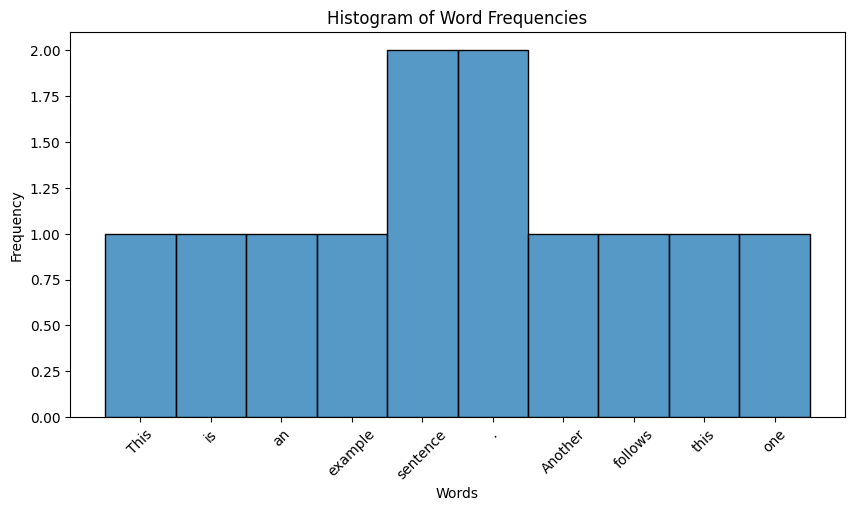

In [6]:
from nltk.tokenize import word_tokenize
import seaborn as sns
import matplotlib.pyplot as plt

# Example text data (replace with your actual text data)
text = "This is an example sentence. Another sentence follows this one."

# Tokenize the text
tokens = word_tokenize(text)

# Plot histogram of word frequencies
plt.figure(figsize=(10, 5))
sns.histplot(tokens, kde=False)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Histogram of Word Frequencies')
plt.xticks(rotation=45)
plt.show()